## Importing Necessary Libraries

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
 
from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm
from statsmodels.api import add_constant
from statsmodels.api import Logit

from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from IPython.display import Image 

plt.rcParams['figure.figsize'] = [15,8]

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
from xgboost import XGBClassifier

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [96]:
df_train = pd.read_csv('Data_Train.csv')
df_train.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0   95074    421802      II     >10yrs            Vfied  633600.000000   
1  134131   3964312      IV       7yrs  Source Verified   85483.200000   
2   92602   4247560     III       <1yr  Source Verified   79200.000000   
3   22591    197179     III       <1yr            Vfied   61600.000000   
4  125060   4646684       V       2yrs  Source Verified   68053.920000   

  Home Status  Unpaid 2 years  Already Defaulted       Designation  \
0    MOR??AGE               0                  0   GLENDALE NISSAN   
1        REN?               0                  0  Business Teacher   
2        REN?               0                  0            driver   
3        REN?               0                  0          AvePoint   
4        REN?               0                  0       Lead Tester   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0       12.549600 91300.000000 42023.250000                    0   
1        9.004800 27400.000000 38133.000000                    0   
2       24.914400 32800.000000 17100.000000                    0   
3       16.581600  7000.000000  5130.000000                    0   
4       40.051200 70800.000000 19665.000000                    0   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0         15.390000   88.924000          3    607161.900000          0.000000   
1          9.940000  102.856000          0    269234.060000          0.000000   
2         22.350000   60.372000          0     22476.530000          0.000000   
3         10.360000  116.272000          1     15242.090000          0.000000   
4         13.680000  127.280000          1     65433.940000          0.000000   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           19  fully paid  California            17     58598.000000   
1           30       whole          NC            15     18924.000000   
2           25       whole     Florida             7     15604.000000   
3           22  fully paid   NewJersey             9     22410.000000   
4           32  fully paid          LA            10     36022.000000   

  Duration  Unpaid Amount               Reason Claim Type  Due Fee  \
0  3 years   31216.050000  debt  consolidation          I 0.000000   
1  5 years   11660.490000  debt  consolidation          I 0.000000   
2  5 years    5637.870000      major  purchase          I 0.000000   
3  3 years   15607.170000      major  purchase          I 0.000000   
4  5 years   27472.860000  debt  consolidation          I 0.000000   

   Loan/No Loan  
0             0  
1             0  
2             0  
3             1  
4             0

In [8]:
df_train.tail()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
87495  120884   4535984      II     >10yrs        Not Vfied   75680.000000   
87496   33259   2624710      IV       3yrs  Source Verified   90423.520000   
87497  102153   5966919      II     >10yrs  Source Verified   91520.000000   
87498  115343   2630667     III       1yrs  Source Verified   61600.000000   
87499  104968   6637289     III       2yrs            Vfied            NaN   

      Home Status  Unpaid 2 years  Already Defaulted            Designation  \
87495        REN?               0                  0    Engineer Support II   
87496        REN?               0                  0       Dental Hygienist   
87497    MOR??AGE               0                  0  Interface Coordinator   
87498    MOR??AGE               0                  0            PARTS CLERK   
87499        REN?               0                  0      Outside sales rep   

       Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
87495       19.320000 48000.000000 10260.000000                    0   
87496       48.820800  1400.000000 27360.000000                    0   
87497        7.795200  6400.000000  8550.000000                    3   
87498        8.299200 16800.000000 23769.000000                    1   
87499       15.187200 92800.000000 28471.500000                    1   

       Interest Charged  Usage Rate  Inquiries  Present Balance  \
87495          8.350000   51.084000          1     15100.140000   
87496         24.180000  129.172000          0    102811.880000   
87497         11.030000   83.420000          1     14584.110000   
87498         22.520000   56.760000          1     59281.660000   
87499         15.530000   67.080000          0     10445.850000   

       Gross Collection  Sub GGGrade File Status       State  Account Open  \
87495          0.000000           17       whole          MI            12   
87496          0.000000           28       whole          MA            23   
87497          0.000000           16  fully paid          CT             8   
87498          0.000000           25       whole          PA            11   
87499          0.000000           25       whole  California             7   

       Total Unpaid CL Duration  Unpaid Amount               Reason  \
87495     32702.000000  3 years   10012.050000  debt  consolidation   
87496     32204.000000  5 years   24921.540000  debt  consolidation   
87497     29050.000000  3 years   14517.900000  debt  consolidation   
87498     24900.000000  3 years    8454.240000  debt  consolidation   
87499     21746.000000  5 years    8717.580000  debt  consolidation   

      Claim Type  Due Fee  Loan/No Loan  
87495          I 0.000000             0  
87496          I 0.000000             0  
87497          I 0.000000             0  
87498          I 0.000000             0  
87499          I 0.000000             0

In [9]:
df_test = pd.read_csv('Data_Test.csv')
df_test.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0  198980   1773284      II       2yrs  Source Verified  140800.000000   
1  167688   5298273      II     >10yrs            Vfied  146080.000000   
2  198768    189781      VI     >10yrs            Vfied  202222.240000   
3  192564   1530906      II     >10yrs            Vfied  105600.000000   
4  151199   4410316     III       4yrs        Not Vfied  151360.000000   

  Home Status  Unpaid 2 years  Already Defaulted                  Designation  \
0         OWN               0                  0                    processor   
1    MOR??AGE               0                  0  Speech Language Pathologist   
2    MOR??AGE               0                  0                     Raytheon   
3    MOR??AGE               1                  0  Computer/Network Technician   
4    MOR??AGE               0                  0                     NDE Tech   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0       16.917600 90600.000000 17955.000000                    0   
1       28.694400 32300.000000 59850.000000                    0   
2       51.156000 88000.000000 59850.000000                    0   
3       27.014400 19900.000000 19323.000000                    0   
4       10.382400 34900.000000 25350.750000                    1   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0          8.880000   78.432000          1     59769.300000          0.000000   
1         10.100000   76.368000          1    532962.130000          0.000000   
2         19.300000  157.552000          2    288816.480000          0.000000   
3          8.820000   32.852000          2    424664.300000          0.000000   
4         13.520000  108.532000          1    251704.070000          0.000000   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           17  fully paid  California            23     33532.000000   
1           19       whole     Florida            17    149234.000000   
2           37       whole          NM            15     70218.000000   
3           19  fully paid          DE            18     79182.000000   
4           25  fully paid     Florida             7     13612.000000   

  Duration  Unpaid Amount               Reason Claim Type  Due Fee  
0  3 years   15755.940000      major  purchase          I 0.000000  
1  5 years   68237.550000  debt  consolidation          I 0.000000  
2  5 years   66272.760000  debt  consolidation          I 0.000000  
3  3 years   15595.200000         credit  card          I 0.000000  
4  3 years    8850.960000  debt  consolidation          I 0.000000

**Data Cleaning For Training Dataset**

In [10]:
print('Shape of the training data set is :', df_train.shape)
print('-------------------------------------------------------------')
print('Shape of the testing data set is :', df_test.shape)
print('-------------------------------------------------------------')
print(df_train.info())
print('-------------------------------------------------------------')
print(df_test.info())

Shape of the training data set is : (87500, 30)
-------------------------------------------------------------
Shape of the testing data set is : (37500, 29)
-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code      

In [11]:
print('The training data set consists of following data types:', '\n', df_train.dtypes)
print('-----------------------------------------------------------------------------')
print('The testing data set consists of following data types:', '\n', df_test.dtypes)

The training data set consists of following data types: 
 ID                       int64
Asst_Reg                 int64
GGGrade                 object
Experience              object
Validation              object
Yearly Income          float64
Home Status             object
Unpaid 2 years           int64
Already Defaulted        int64
Designation             object
Debt to Income         float64
Postal Code            float64
Lend Amount            float64
Deprecatory Records      int64
Interest Charged       float64
Usage Rate             float64
Inquiries                int64
Present Balance        float64
Gross Collection       float64
Sub GGGrade              int64
File Status             object
State                   object
Account Open             int64
Total Unpaid CL        float64
Duration                object
Unpaid Amount          float64
Reason                  object
Claim Type              object
Due Fee                float64
Loan/No Loan             int64
dtype: objec

## 1 Data Cleaning

In this section you can do all the Data cleaning part of all necessary imputations and treatments























In [12]:
Total = df_train.isnull().sum().sort_values(ascending=False)          
Percent = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
Yearly Income         5575                      6.371429
Unpaid Amount         4852                      5.545143
Total Unpaid CL       4186                      4.784000
Debt to Income        3489                      3.987429
Designation           1414                      1.616000
Postal Code           1389                      1.587429
Sub GGGrade              0                      0.000000
File Status              0                      0.000000
State                    0                      0.000000
Account Open             0                      0.000000
ID                       0                      0.000000
Present Balance          0                      0.000000
Duration                 0                      0.000000
Reason                   0                      0.000000
Claim Type               0                      0.000000
Due Fee                  0                      0.000000
Gross Collection         0                      0.000000
Usage Rate               0                      0.000000
Inquiries                0                      0.000000
Asst_Reg                 0                      0.000000
Interest Charged         0                      0.000000
Deprecatory Records      0                      0.000000
Lend Amount              0                      0.000000
Already Defaulted        0                      0.000000
Unpaid 2 years           0                      0.000000
Home Status              0                      0.000000
Validation               0                      0.000000
Experience               0                      0.000000
GGGrade                  0                      0.000000
Loan/No Loan             0                      0.000000

**Insights:**

    1. From the above output, we can see that there are some null values present in the data set, where, column 'Yearly Income has maximum number of null values i.e, 6.37%, followed by 'Unpaid Amount', 'Total Unpaid CL', 'Debt To Income', 'Designation' and 'Postal Code' being the lowest in context of null values.
    
    2.However, their percentage is not much so we cannot drop the columns as it may cause data loss. So, we are treating the null values with appropriate measures.

**Null Value Treatment**

In [13]:
df_train['Yearly Income'].fillna(value = df_train['Yearly Income'].mode()[0],inplace=True)
df_train['Unpaid Amount'].fillna(value = df_train['Unpaid Amount'].mode()[0],inplace=True)
df_train['Total Unpaid CL'].fillna(value = df_train['Total Unpaid CL'].mode()[0],inplace=True)
df_train['Debt to Income'].fillna(value = df_train['Debt to Income'].mode()[0],inplace=True)
df_train['Designation'].fillna(df_train['Designation'].mode()[0], inplace=True)
df_train['Postal Code'].fillna(value = df_train['Postal Code'].mode()[0],inplace=True)

In [14]:
Total = df_train.isnull().sum().sort_values(ascending=False)          
Percent = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
ID                       0                      0.000000
Asst_Reg                 0                      0.000000
Due Fee                  0                      0.000000
Claim Type               0                      0.000000
Reason                   0                      0.000000
Unpaid Amount            0                      0.000000
Duration                 0                      0.000000
Total Unpaid CL          0                      0.000000
Account Open             0                      0.000000
State                    0                      0.000000
File Status              0                      0.000000
Sub GGGrade              0                      0.000000
Gross Collection         0                      0.000000
Present Balance          0                      0.000000
Inquiries                0                      0.000000
Usage Rate               0                      0.000000
Interest Charged         0                      0.000000
Deprecatory Records      0                      0.000000
Lend Amount              0                      0.000000
Postal Code              0                      0.000000
Debt to Income           0                      0.000000
Designation              0                      0.000000
Already Defaulted        0                      0.000000
Unpaid 2 years           0                      0.000000
Home Status              0                      0.000000
Yearly Income            0                      0.000000
Validation               0                      0.000000
Experience               0                      0.000000
GGGrade                  0                      0.000000
Loan/No Loan             0                      0.000000

**Insights:**

    1. From the above output, we can see that after null value treatment, we do not have any null values in our data set.
    
    2. As we know that treating null values with mean() of the data may have adverse effect as mean() is affected by the outliers which may be present with in the data. So, null values are treated/filled with the values which are occuring for the maximum times in their respective column.

In [15]:
print('Total columns in the data set are as below:', '\n', df_train.columns)

Total columns in the data set are as below: 
 Index(['ID', 'Asst_Reg', 'GGGrade', 'Experience', 'Validation',
       'Yearly Income', 'Home Status', 'Unpaid 2 years', 'Already Defaulted',
       'Designation', 'Debt to Income', 'Postal Code', 'Lend Amount',
       'Deprecatory Records', 'Interest Charged', 'Usage Rate', 'Inquiries',
       'Present Balance', 'Gross Collection', 'Sub GGGrade', 'File Status',
       'State', 'Account Open', 'Total Unpaid CL', 'Duration', 'Unpaid Amount',
       'Reason', 'Claim Type', 'Due Fee', 'Loan/No Loan'],
      dtype='object')


In [16]:
df_train.rename(columns = {'Loan/No Loan':'Loan_Status'}, inplace=True)

**Insight:**
For better understanding, we have changed the column name 'Loan/No Loan' to 'Loan Status'

In [17]:
print('Value Counts of Experience columns is :', '\n' , df_train['Experience'].value_counts())
print('-----------------------------------------------------------------------------------------------------')
print('The data type of Experience column is:', '\n', df_train['Experience'].dtype)


Value Counts of Experience columns is : 
 >10yrs    30849
2yrs       8064
3yrs       7350
<1yr       7209
1yrs       5853
5yrs       5623
4yrs       5324
7yrs       4762
8yrs       4604
6yrs       4255
9yrs       3607
Name: Experience, dtype: int64
-----------------------------------------------------------------------------------------------------
The data type of Experience column is: 
 object


In [18]:
df_train['Experience'] = df_train['Experience'].replace({'>10yrs':'10','1yrs':'1', '<1yr':'0', '2yrs':'2', '3yrs':'3', '4yrs':'4', 
                                                         '5yrs':'5', '6yrs':'6', '7yrs':'7', '8yrs':'8', '9yrs':'9'})

In [19]:
print('Value Counts of Experience columns is :', '\n' , df_train['Experience'].value_counts())
print('-----------------------------------------------------------------------------------------------------')
print('The data type of Experience column is:', '\n', df_train['Experience'].dtype)


Value Counts of Experience columns is : 
 10    30849
2      8064
3      7350
0      7209
1      5853
5      5623
4      5324
7      4762
8      4604
6      4255
9      3607
Name: Experience, dtype: int64
-----------------------------------------------------------------------------------------------------
The data type of Experience column is: 
 object


In [20]:
df_train['GGGrade'] = df_train['GGGrade'].replace({'I':'1', 'II':'2','III':'3', 'IV':'4', 'V':'5', 'VI':'6', 'VII':'7'})

In [21]:
df_train['Home Status'] = df_train['Home Status'].replace({'MOR??AGE':'Mortgage', 'REN?':'Rent', 'OWN':'Own', 'OTHER':'Other', 'NONE':'None'})

In [22]:
df_train['Duration'] = df_train['Duration'].replace({'3 years':'3', '5 years':'5'})
df_train['Duration'].astype(np.number)

0       3.000000
1       5.000000
2       5.000000
3       3.000000
4       5.000000
5       3.000000
6       3.000000
7       3.000000
8       5.000000
9       3.000000
10      5.000000
11      5.000000
12      3.000000
13      3.000000
14      3.000000
15      3.000000
16      3.000000
17      3.000000
18      3.000000
19      5.000000
20      5.000000
21      5.000000
22      5.000000
23      3.000000
24      3.000000
25      3.000000
26      3.000000
27      5.000000
28      5.000000
29      5.000000
30      3.000000
31      3.000000
32      5.000000
33      5.000000
34      3.000000
35      5.000000
36      3.000000
37      3.000000
38      3.000000
39      3.000000
40      3.000000
41      3.000000
42      5.000000
43      3.000000
44      3.000000
45      3.000000
46      5.000000
47      3.000000
48      3.000000
49      3.000000
50      5.000000
51      5.000000
52      3.000000
53      3.000000
54      3.000000
55      5.000000
56      5.000000
57      5.000000
58      3.0000

In [23]:
df_train['Validation'] = df_train['Validation'].replace({'Vfied':'Verified', 'Not Vfied':'Not Verified'})

In [24]:
df_train.describe()

ID       Asst_Reg  Yearly Income  Unpaid 2 years  \
count  87500.000000   87500.000000   87500.000000    87500.000000   
mean   83946.253509 3798914.124149  132995.373368        0.332937   
std    36100.102950 2289038.082588   95891.278777        0.876080   
min    21560.000000   24847.000000    8800.000000        0.000000   
25%    52616.750000 1483874.250000   86240.000000        0.000000   
50%    83900.000000 4132010.500000  109824.000000        0.000000   
75%   115261.250000 5952908.750000  158400.000000        0.000000   
max   146559.000000 7351847.000000 8264030.720000       18.000000   

       Already Defaulted  Debt to Income  Postal Code  Lend Amount  \
count       87500.000000    87500.000000 87500.000000 87500.000000   
mean            0.005726       30.625251 51533.901714 25920.535680   
std             0.083505       13.883885 31105.615360 14433.837213   
min             0.000000        0.000000  1000.000000  1710.000000   
25%             0.000000       20.848800 23200.000000 15048.000000   
50%             0.000000       29.332800 48100.000000 23940.000000   
75%             0.000000       40.404000 80100.000000 34200.000000   
max             6.000000      639.290400 99900.000000 59850.000000   

       Deprecatory Records  Interest Charged   Usage Rate    Inquiries  \
count         87500.000000      87500.000000 87500.000000 87500.000000   
mean              0.202400         16.518375    95.517348     0.670640   
std               0.646414          4.902011    40.554035     0.959572   
min               0.000000          8.000000     0.000000     0.000000   
25%               0.000000         12.310000    66.048000     0.000000   
50%               0.000000         16.490000    97.008000     0.000000   
75%               0.000000         20.770000   126.592000     1.000000   
max              86.000000         25.000000  1534.756000     8.000000   

       Present Balance  Gross Collection  Sub GGGrade  Account Open  \
count     87500.000000      87500.000000 87500.000000  87500.000000   
mean     236389.464783         39.461697    22.024891     12.779440   
std      255056.781907        391.919578     6.452697      5.371160   
min           0.000000          0.000000    11.000000      2.000000   
25%       51734.930000          0.000000    17.000000      9.000000   
50%      138806.225000          0.000000    21.000000     12.000000   
75%      353475.540000          0.000000    26.000000     16.000000   
max     5629234.330000      26308.470000    45.000000     83.000000   

       Total Unpaid CL  Unpaid Amount      Due Fee  Loan_Status  
count     87500.000000   87500.000000 87500.000000 87500.000000  
mean      51871.777437   27917.544679     0.316407     0.188709  
std       52338.346590   37026.054022     3.546087     0.391279  
min         332.000000       0.000000     0.000000     0.000000  
25%       24070.000000    9969.300000     0.000000     0.000000  
50%       37682.000000   19611.990000     0.000000     0.000000  
75%       64408.000000   35096.040000     0.000000     0.000000  
max     1710630.000000 1338777.810000   169.050000     1.000000

**Insights:**

    1. Customer with 'ID' = 146559 has defaulted maximum and customer with 'ID' = 21560 has defaulted minimum amongst the customers who have defauted.
    2. Fields like 'Debt to Income' and 'Interest Charged' are directly proportional to each other.

In [25]:
print(df_train['Home Status'].unique())
print('------------------------------------------------------------------------------')
print(df_train['Validation'].unique())
print('------------------------------------------------------------------------------')
print(df_train['Reason'].unique())
print('------------------------------------------------------------------------------')
print(df_train['Claim Type'].unique())

['Mortgage' 'Rent' 'Own' 'Other' 'None']
------------------------------------------------------------------------------
['Verified' 'Source Verified' 'Not Verified']
------------------------------------------------------------------------------
['debt  consolidation' 'major  purchase' 'other' 'credit  card' 'car'
 'home  improvement' 'small  business' 'moving' 'vacation' 'medical'
 'wedding' 'house' 'renewable  energy']
------------------------------------------------------------------------------
['I' 'J']


In [26]:
df_train['Claim Type'] = df_train['Claim Type'].map({'I':0, 'J':1})

In [27]:
df_train_copy = df_train.copy()

In [28]:
df_train_copy.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0   95074    421802       2         10         Verified  633600.000000   
1  134131   3964312       4          7  Source Verified   85483.200000   
2   92602   4247560       3          0  Source Verified   79200.000000   
3   22591    197179       3          0         Verified   61600.000000   
4  125060   4646684       5          2  Source Verified   68053.920000   

  Home Status  Unpaid 2 years  Already Defaulted       Designation  \
0    Mortgage               0                  0   GLENDALE NISSAN   
1        Rent               0                  0  Business Teacher   
2        Rent               0                  0            driver   
3        Rent               0                  0          AvePoint   
4        Rent               0                  0       Lead Tester   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0       12.549600 91300.000000 42023.250000                    0   
1        9.004800 27400.000000 38133.000000                    0   
2       24.914400 32800.000000 17100.000000                    0   
3       16.581600  7000.000000  5130.000000                    0   
4       40.051200 70800.000000 19665.000000                    0   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0         15.390000   88.924000          3    607161.900000          0.000000   
1          9.940000  102.856000          0    269234.060000          0.000000   
2         22.350000   60.372000          0     22476.530000          0.000000   
3         10.360000  116.272000          1     15242.090000          0.000000   
4         13.680000  127.280000          1     65433.940000          0.000000   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           19  fully paid  California            17     58598.000000   
1           30       whole          NC            15     18924.000000   
2           25       whole     Florida             7     15604.000000   
3           22  fully paid   NewJersey             9     22410.000000   
4           32  fully paid          LA            10     36022.000000   

  Duration  Unpaid Amount               Reason  Claim Type  Due Fee  \
0        3   31216.050000  debt  consolidation           0 0.000000   
1        5   11660.490000  debt  consolidation           0 0.000000   
2        5    5637.870000      major  purchase           0 0.000000   
3        3   15607.170000      major  purchase           0 0.000000   
4        5   27472.860000  debt  consolidation           0 0.000000   

   Loan_Status  
0            0  
1            0  
2            0  
3            1  
4            0

In [29]:
df_train_copy.describe(include='object')

GGGrade Experience       Validation Home Status     Designation  \
count    87500      87500            87500       87500           87500   
unique       7         11                3           5           40354   
top          2         10  Source Verified    Mortgage  School Teacher   
freq     24966      30849            34504       44160            2999   

       File Status       State Duration               Reason  
count        87500       87500    87500                87500  
unique           2          49        2                   13  
top          whole  California        3  debt  consolidation  
freq         46300       12625    60061                52559

In [30]:
df_train_copy.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0   95074    421802       2         10         Verified  633600.000000   
1  134131   3964312       4          7  Source Verified   85483.200000   
2   92602   4247560       3          0  Source Verified   79200.000000   
3   22591    197179       3          0         Verified   61600.000000   
4  125060   4646684       5          2  Source Verified   68053.920000   

  Home Status  Unpaid 2 years  Already Defaulted       Designation  \
0    Mortgage               0                  0   GLENDALE NISSAN   
1        Rent               0                  0  Business Teacher   
2        Rent               0                  0            driver   
3        Rent               0                  0          AvePoint   
4        Rent               0                  0       Lead Tester   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0       12.549600 91300.000000 42023.250000                    0   
1        9.004800 27400.000000 38133.000000                    0   
2       24.914400 32800.000000 17100.000000                    0   
3       16.581600  7000.000000  5130.000000                    0   
4       40.051200 70800.000000 19665.000000                    0   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0         15.390000   88.924000          3    607161.900000          0.000000   
1          9.940000  102.856000          0    269234.060000          0.000000   
2         22.350000   60.372000          0     22476.530000          0.000000   
3         10.360000  116.272000          1     15242.090000          0.000000   
4         13.680000  127.280000          1     65433.940000          0.000000   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           19  fully paid  California            17     58598.000000   
1           30       whole          NC            15     18924.000000   
2           25       whole     Florida             7     15604.000000   
3           22  fully paid   NewJersey             9     22410.000000   
4           32  fully paid          LA            10     36022.000000   

  Duration  Unpaid Amount               Reason  Claim Type  Due Fee  \
0        3   31216.050000  debt  consolidation           0 0.000000   
1        5   11660.490000  debt  consolidation           0 0.000000   
2        5    5637.870000      major  purchase           0 0.000000   
3        3   15607.170000      major  purchase           0 0.000000   
4        5   27472.860000  debt  consolidation           0 0.000000   

   Loan_Status  
0            0  
1            0  
2            0  
3            1  
4            0

**Data Cleaning For Testing Dataset**

In [31]:
df_test.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0  198980   1773284      II       2yrs  Source Verified  140800.000000   
1  167688   5298273      II     >10yrs            Vfied  146080.000000   
2  198768    189781      VI     >10yrs            Vfied  202222.240000   
3  192564   1530906      II     >10yrs            Vfied  105600.000000   
4  151199   4410316     III       4yrs        Not Vfied  151360.000000   

  Home Status  Unpaid 2 years  Already Defaulted                  Designation  \
0         OWN               0                  0                    processor   
1    MOR??AGE               0                  0  Speech Language Pathologist   
2    MOR??AGE               0                  0                     Raytheon   
3    MOR??AGE               1                  0  Computer/Network Technician   
4    MOR??AGE               0                  0                     NDE Tech   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0       16.917600 90600.000000 17955.000000                    0   
1       28.694400 32300.000000 59850.000000                    0   
2       51.156000 88000.000000 59850.000000                    0   
3       27.014400 19900.000000 19323.000000                    0   
4       10.382400 34900.000000 25350.750000                    1   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0          8.880000   78.432000          1     59769.300000          0.000000   
1         10.100000   76.368000          1    532962.130000          0.000000   
2         19.300000  157.552000          2    288816.480000          0.000000   
3          8.820000   32.852000          2    424664.300000          0.000000   
4         13.520000  108.532000          1    251704.070000          0.000000   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           17  fully paid  California            23     33532.000000   
1           19       whole     Florida            17    149234.000000   
2           37       whole          NM            15     70218.000000   
3           19  fully paid          DE            18     79182.000000   
4           25  fully paid     Florida             7     13612.000000   

  Duration  Unpaid Amount               Reason Claim Type  Due Fee  
0  3 years   15755.940000      major  purchase          I 0.000000  
1  5 years   68237.550000  debt  consolidation          I 0.000000  
2  5 years   66272.760000  debt  consolidation          I 0.000000  
3  3 years   15595.200000         credit  card          I 0.000000  
4  3 years    8850.960000  debt  consolidation          I 0.000000

In [32]:
df_test.tail()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
37495  191405   5774816      IV       4yrs            Vfied  308000.000000   
37496  164868   1423834      IV       8yrs  Source Verified  158400.000000   
37497  163156   1895531       V     >10yrs        Not Vfied   52800.000000   
37498  169610   2168910      VI       9yrs        Not Vfied   52800.000000   
37499  175557   4140268      II     >10yrs  Source Verified  121440.000000   

      Home Status  Unpaid 2 years  Already Defaulted           Designation  \
37495    MOR??AGE               1                  0      Regional Manager   
37496    MOR??AGE               0                  0  Clinical Coordinator   
37497         OWN               0                  0        administrative   
37498         OWN               5                  0          ParaEducator   
37499    MOR??AGE               0                  0        School Teacher   

       Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
37495       29.433600 91700.000000 59850.000000                    0   
37496       31.600800 19500.000000 28215.000000                    0   
37497       46.972800 90800.000000  4916.250000                    1   
37498       48.048000 37000.000000 15390.000000                    1   
37499       27.266400 91900.000000 24624.000000                    0   

       Interest Charged  Usage Rate  Inquiries  Present Balance  \
37495         19.150000   52.116000          4    848107.830000   
37496         19.020000  165.120000          1    614710.300000   
37497         18.680000   54.868000          3     47287.720000   
37498         10.470000  137.772000          1    107614.800000   
37499          9.800000  104.060000          0    783477.160000   

       Gross Collection  Sub GGGrade File Status       State  Account Open  \
37495          0.000000           29  fully paid  California            19   
37496          0.000000           28  fully paid          PA            14   
37497          0.000000           33  fully paid  California             9   
37498          0.000000           40       whole          TN             9   
37499          0.000000           19  fully paid  California            15   

       Total Unpaid CL Duration  Unpaid Amount               Reason  \
37495    132468.000000  3 years   57683.430000  debt  consolidation   
37496     51958.000000  5 years   51395.760000         credit  card   
37497      8466.000000  3 years    2783.880000  debt  consolidation   
37498     17264.000000  3 years            NaN    home  improvement   
37499     47310.000000  3 years   29504.340000  debt  consolidation   

      Claim Type  Due Fee  
37495          I 0.000000  
37496          I 0.000000  
37497          I 0.000000  
37498          I 0.000000  
37499          I 0.000000

In [33]:
print('Shape of the testing data set is :', df_test.shape)
print('-------------------------------------------------------------')
print(df_test.info())

Shape of the testing data set is : (37500, 29)
-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   37500 non-null  int64  
 1   Asst_Reg             37500 non-null  int64  
 2   GGGrade              37500 non-null  object 
 3   Experience           37500 non-null  object 
 4   Validation           37500 non-null  object 
 5   Yearly Income        35075 non-null  float64
 6   Home Status          37500 non-null  object 
 7   Unpaid 2 years       37500 non-null  int64  
 8   Already Defaulted    37500 non-null  int64  
 9   Designation          36914 non-null  object 
 10  Debt to Income       35989 non-null  float64
 11  Postal Code          36889 non-null  float64
 12  Lend Amount          37500 non-null  float64
 13  Deprecatory Records  37500 

In [34]:
print('The testing data set consists of following data types:', '\n', df_test.dtypes)

The testing data set consists of following data types: 
 ID                       int64
Asst_Reg                 int64
GGGrade                 object
Experience              object
Validation              object
Yearly Income          float64
Home Status             object
Unpaid 2 years           int64
Already Defaulted        int64
Designation             object
Debt to Income         float64
Postal Code            float64
Lend Amount            float64
Deprecatory Records      int64
Interest Charged       float64
Usage Rate             float64
Inquiries                int64
Present Balance        float64
Gross Collection       float64
Sub GGGrade              int64
File Status             object
State                   object
Account Open             int64
Total Unpaid CL        float64
Duration                object
Unpaid Amount          float64
Reason                  object
Claim Type              object
Due Fee                float64
dtype: object


In [35]:
Total_test = df_test.isnull().sum().sort_values(ascending=False)          
Percent_test = (df_test.isnull().sum()*100/df_test.isnull().count()).sort_values(ascending=False)   

missing_data_test = pd.concat([Total_test, Percent_test], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data_test

Total  Percentage of Missing Values
Yearly Income         2425                      6.466667
Unpaid Amount         2069                      5.517333
Total Unpaid CL       1814                      4.837333
Debt to Income        1511                      4.029333
Postal Code            611                      1.629333
Designation            586                      1.562667
ID                       0                      0.000000
Present Balance          0                      0.000000
Claim Type               0                      0.000000
Reason                   0                      0.000000
Duration                 0                      0.000000
Account Open             0                      0.000000
State                    0                      0.000000
File Status              0                      0.000000
Sub GGGrade              0                      0.000000
Gross Collection         0                      0.000000
Interest Charged         0                      0.000000
Inquiries                0                      0.000000
Usage Rate               0                      0.000000
Asst_Reg                 0                      0.000000
Deprecatory Records      0                      0.000000
Lend Amount              0                      0.000000
Already Defaulted        0                      0.000000
Unpaid 2 years           0                      0.000000
Home Status              0                      0.000000
Validation               0                      0.000000
Experience               0                      0.000000
GGGrade                  0                      0.000000
Due Fee                  0                      0.000000

In [36]:
df_test['Yearly Income'].fillna(value = df_test['Yearly Income'].mode()[0],inplace=True)
df_test['Unpaid Amount'].fillna(value = df_test['Unpaid Amount'].mode()[0],inplace=True)
df_test['Total Unpaid CL'].fillna(value = df_test['Total Unpaid CL'].mode()[0],inplace=True)
df_test['Debt to Income'].fillna(value = df_test['Debt to Income'].mode()[0],inplace=True)
df_test['Designation'].fillna(df_test['Designation'].mode()[0], inplace=True)
df_test['Postal Code'].fillna(value = df_test['Postal Code'].mode()[0],inplace=True)

In [37]:
Total_test = df_test.isnull().sum().sort_values(ascending=False)          
Percent_test = (df_test.isnull().sum()*100/df_test.isnull().count()).sort_values(ascending=False)   

missing_data_test = pd.concat([Total_test, Percent_test], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data_test

Total  Percentage of Missing Values
ID                       0                      0.000000
Usage Rate               0                      0.000000
Claim Type               0                      0.000000
Reason                   0                      0.000000
Unpaid Amount            0                      0.000000
Duration                 0                      0.000000
Total Unpaid CL          0                      0.000000
Account Open             0                      0.000000
State                    0                      0.000000
File Status              0                      0.000000
Sub GGGrade              0                      0.000000
Gross Collection         0                      0.000000
Present Balance          0                      0.000000
Inquiries                0                      0.000000
Interest Charged         0                      0.000000
Asst_Reg                 0                      0.000000
Deprecatory Records      0                      0.000000
Lend Amount              0                      0.000000
Postal Code              0                      0.000000
Debt to Income           0                      0.000000
Designation              0                      0.000000
Already Defaulted        0                      0.000000
Unpaid 2 years           0                      0.000000
Home Status              0                      0.000000
Yearly Income            0                      0.000000
Validation               0                      0.000000
Experience               0                      0.000000
GGGrade                  0                      0.000000
Due Fee                  0                      0.000000

In [38]:
print('Value Counts of Experience columns is :', '\n' , df_test['Experience'].value_counts())
print('-----------------------------------------------------------------------------------------------------')
print('The data type of Experience column is:', '\n', df_test['Experience'].dtype)

Value Counts of Experience columns is : 
 >10yrs    13159
2yrs       3412
3yrs       3128
<1yr       3102
1yrs       2443
5yrs       2412
4yrs       2239
8yrs       2144
7yrs       1969
6yrs       1857
9yrs       1635
Name: Experience, dtype: int64
-----------------------------------------------------------------------------------------------------
The data type of Experience column is: 
 object


In [39]:
df_test['Experience'] = df_test['Experience'].replace({'>10yrs':'10','1yrs':'1', '<1yr':'0', '2yrs':'2', '3yrs':'3', '4yrs':'4', 
                                                         '5yrs':'5', '6yrs':'6', '7yrs':'7', '8yrs':'8', '9yrs':'9'})

In [40]:
print('Value Counts of Experience columns is :', '\n' , df_train['Experience'].value_counts())
print('-----------------------------------------------------------------------------------------------------')
print('The data type of Experience column is:', '\n', df_train['Experience'].dtype)
print('-----------------------------------------------------------------------------------------------------')
df_test['Experience'].astype(np.number)

Value Counts of Experience columns is : 
 10    30849
2      8064
3      7350
0      7209
1      5853
5      5623
4      5324
7      4762
8      4604
6      4255
9      3607
Name: Experience, dtype: int64
-----------------------------------------------------------------------------------------------------
The data type of Experience column is: 
 object
-----------------------------------------------------------------------------------------------------


0        2.000000
1       10.000000
2       10.000000
3       10.000000
4        4.000000
5        9.000000
6        1.000000
7       10.000000
8        9.000000
9       10.000000
10      10.000000
11       0.000000
12      10.000000
13      10.000000
14      10.000000
15       0.000000
16       9.000000
17       0.000000
18       3.000000
19       0.000000
20      10.000000
21       3.000000
22      10.000000
23      10.000000
24       3.000000
25      10.000000
26       5.000000
27      10.000000
28       8.000000
29       2.000000
30       0.000000
31      10.000000
32       7.000000
33      10.000000
34      10.000000
35      10.000000
36       1.000000
37       8.000000
38       3.000000
39      10.000000
40       4.000000
41       7.000000
42       5.000000
43      10.000000
44       4.000000
45      10.000000
46       5.000000
47       2.000000
48       2.000000
49       2.000000
50       4.000000
51       2.000000
52       7.000000
53       4.000000
54      10.000000
55       9

In [41]:
df_test['GGGrade'] = df_test['GGGrade'].replace({'I':'1', 'II':'2','III':'3', 'IV':'4', 'V':'5', 'VI':'6', 'VII':'7'})
df_test['Home Status'] = df_test['Home Status'].replace({'MOR??AGE':'Mortgage', 'REN?':'Rent', 'OWN':'Own', 
                                                           'OTHER':'Other', 'NONE':'None'})
df_test['Duration'] = df_test['Duration'].replace({'3 years':'3', '5 years':'5'})
df_test['Duration'].astype(np.number)

0       3.000000
1       5.000000
2       5.000000
3       3.000000
4       3.000000
5       3.000000
6       3.000000
7       5.000000
8       5.000000
9       3.000000
10      3.000000
11      5.000000
12      5.000000
13      3.000000
14      5.000000
15      3.000000
16      5.000000
17      3.000000
18      3.000000
19      3.000000
20      5.000000
21      3.000000
22      3.000000
23      5.000000
24      3.000000
25      3.000000
26      3.000000
27      3.000000
28      3.000000
29      3.000000
30      3.000000
31      3.000000
32      3.000000
33      3.000000
34      3.000000
35      3.000000
36      3.000000
37      5.000000
38      3.000000
39      3.000000
40      5.000000
41      5.000000
42      3.000000
43      5.000000
44      3.000000
45      3.000000
46      3.000000
47      3.000000
48      3.000000
49      3.000000
50      3.000000
51      3.000000
52      5.000000
53      5.000000
54      3.000000
55      3.000000
56      3.000000
57      3.000000
58      5.0000

In [42]:
df_test['Validation'] = df_test['Validation'].replace({'Vfied':'Verified', 'Not Vfied':'Not Verified'})

In [43]:
df_test.describe()

ID       Asst_Reg  Yearly Income  Unpaid 2 years  \
count  37500.000000   37500.000000   37500.000000    37500.000000   
mean  184143.867973 3804857.794827  132192.305237        0.336427   
std    21683.224387 2284114.951028   97046.489992        0.887640   
min   146560.000000   37522.000000    8800.000000        0.000000   
25%   165341.250000 1495828.500000   86240.000000        0.000000   
50%   184257.000000 4134009.500000  109120.000000        0.000000   
75%   202869.250000 5934897.750000  158400.000000        0.000000   
max   221557.000000 7351969.000000 8800000.000000       18.000000   

       Already Defaulted  Debt to Income  Postal Code  Lend Amount  \
count       37500.000000    37500.000000 37500.000000 37500.000000   
mean            0.005307       30.417820 51621.173333 25828.004160   
std             0.077966       13.807721 31140.490563 14402.061788   
min             0.000000        0.000000  1000.000000  1710.000000   
25%             0.000000       19.185600 23300.000000 14919.750000   
50%             0.000000       29.383200 48100.000000 23811.750000   
75%             0.000000       40.202400 80100.000000 34200.000000   
max             3.000000      116.508000 99900.000000 59850.000000   

       Deprecatory Records  Interest Charged   Usage Rate    Inquiries  \
count         37500.000000      37500.000000 37500.000000 37500.000000   
mean              0.200080         16.511014    95.259109     0.676640   
std               0.563137          4.912595    40.493219     0.964515   
min               0.000000          8.000000     0.000000     0.000000   
25%               0.000000         12.250000    65.532000     0.000000   
50%               0.000000         16.515000    96.492000     0.000000   
75%               0.000000         20.770000   126.764000     1.000000   
max              21.000000         25.000000   254.560000     6.000000   

       Present Balance  Gross Collection  Sub GGGrade  Account Open  \
count     37500.000000      37500.000000 37500.000000  37500.000000   
mean     235352.802339         39.484071    22.031467     12.777787   
std      254309.733180        364.114581     6.481257      5.360527   
min           0.000000          0.000000    11.000000      2.000000   
25%       51295.720000          0.000000    17.000000      9.000000   
50%      138379.540000          0.000000    21.000000     12.000000   
75%      351498.260000          0.000000    26.000000     15.000000   
max     4909890.180000      13900.000000    45.000000     60.000000   

       Total Unpaid CL  Unpaid Amount      Due Fee  
count     37500.000000   37500.000000 37500.000000  
mean      52067.225875   27665.147266     0.309792  
std       51245.091103   35251.944856     3.396315  
min         332.000000       0.000000     0.000000  
25%       24070.000000    9985.972500     0.000000  
50%       37516.000000   19488.015000     0.000000  
75%       64408.000000   34869.037500     0.000000  
max     1475408.000000 1535829.660000   131.490000

In [44]:
print(df_test['Home Status'].unique())
print('------------------------------------------------------------------------------')
print(df_test['Validation'].unique())
print('------------------------------------------------------------------------------')
print(df_test['Reason'].unique())
print('------------------------------------------------------------------------------')
print(df_test['Claim Type'].unique())

['Own' 'Mortgage' 'Rent' 'None' 'Other']
------------------------------------------------------------------------------
['Source Verified' 'Verified' 'Not Verified']
------------------------------------------------------------------------------
['major  purchase' 'debt  consolidation' 'credit  card' 'other'
 'home  improvement' 'house' 'medical' 'small  business' 'vacation'
 'moving' 'car' 'wedding' 'renewable  energy']
------------------------------------------------------------------------------
['I' 'J']


In [45]:
df_test['Claim Type'] = df_test['Claim Type'].map({'I':0, 'J':1})

In [46]:
df_test_copy = df_test.copy()
df_test_copy.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0  198980   1773284       2          2  Source Verified  140800.000000   
1  167688   5298273       2         10         Verified  146080.000000   
2  198768    189781       6         10         Verified  202222.240000   
3  192564   1530906       2         10         Verified  105600.000000   
4  151199   4410316       3          4     Not Verified  151360.000000   

  Home Status  Unpaid 2 years  Already Defaulted                  Designation  \
0         Own               0                  0                    processor   
1    Mortgage               0                  0  Speech Language Pathologist   
2    Mortgage               0                  0                     Raytheon   
3    Mortgage               1                  0  Computer/Network Technician   
4    Mortgage               0                  0                     NDE Tech   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0       16.917600 90600.000000 17955.000000                    0   
1       28.694400 32300.000000 59850.000000                    0   
2       51.156000 88000.000000 59850.000000                    0   
3       27.014400 19900.000000 19323.000000                    0   
4       10.382400 34900.000000 25350.750000                    1   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0          8.880000   78.432000          1     59769.300000          0.000000   
1         10.100000   76.368000          1    532962.130000          0.000000   
2         19.300000  157.552000          2    288816.480000          0.000000   
3          8.820000   32.852000          2    424664.300000          0.000000   
4         13.520000  108.532000          1    251704.070000          0.000000   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           17  fully paid  California            23     33532.000000   
1           19       whole     Florida            17    149234.000000   
2           37       whole          NM            15     70218.000000   
3           19  fully paid          DE            18     79182.000000   
4           25  fully paid     Florida             7     13612.000000   

  Duration  Unpaid Amount               Reason  Claim Type  Due Fee  
0        3   15755.940000      major  purchase           0 0.000000  
1        5   68237.550000  debt  consolidation           0 0.000000  
2        5   66272.760000  debt  consolidation           0 0.000000  
3        3   15595.200000         credit  card           0 0.000000  
4        3    8850.960000  debt  consolidation           0 0.000000

## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

























In [47]:
df_train_copy['Loan_Status'].value_counts()

0    70988
1    16512
Name: Loan_Status, dtype: int64

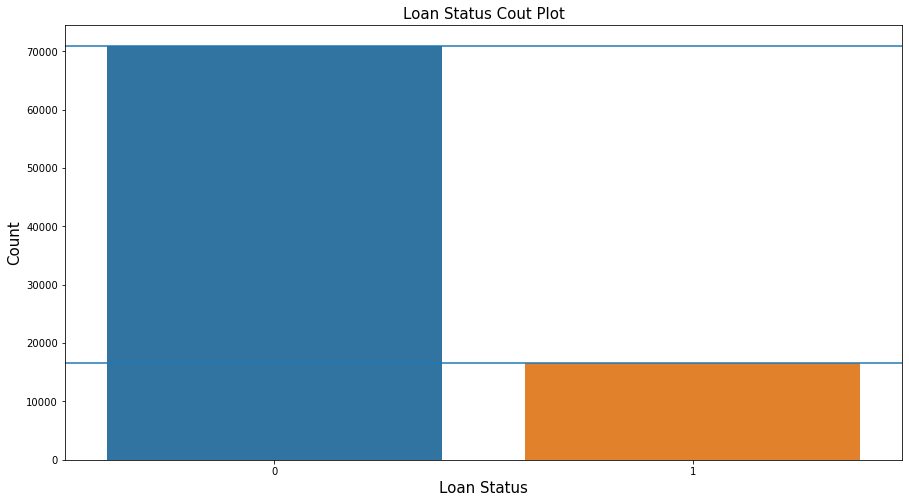

In [48]:
sns.countplot(x = df_train_copy['Loan_Status'])

plt.title('Loan Status Cout Plot', fontsize = 15)
plt.xlabel('Loan Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.axhline(y = 70988)
plt.axhline(y = 16512)
plt.show()

In [49]:
print(70988/len(df_train_copy['Loan_Status']))
print('-----------------------------------------------------------')
print(16512/len(df_train_copy['Loan_Status']))

0.8112914285714286
-----------------------------------------------------------
0.18870857142857142


**Insights:**

    1. From the above plot and analysis, we can see that our data set is quite imbalanced in nature.
    2. The ratio of our data set is approximately 81.11:18.89. Hence, we need to balance our data set using SMOT analysis.

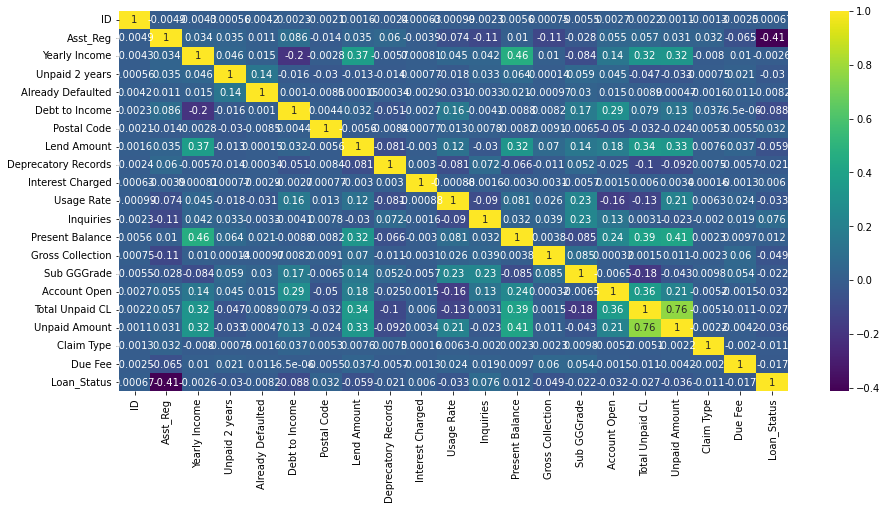

In [50]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_train_copy.corr(), annot=True, cmap='viridis')
plt.show()

**Insights:**

    1. From the above heat map, we can see that there is considerable correlation between "Unpaid Amount" and "Total Unpaid CL". 
    2. This means that "Unpaid Amount" and "Total Unpaid CL" are directly proportional.

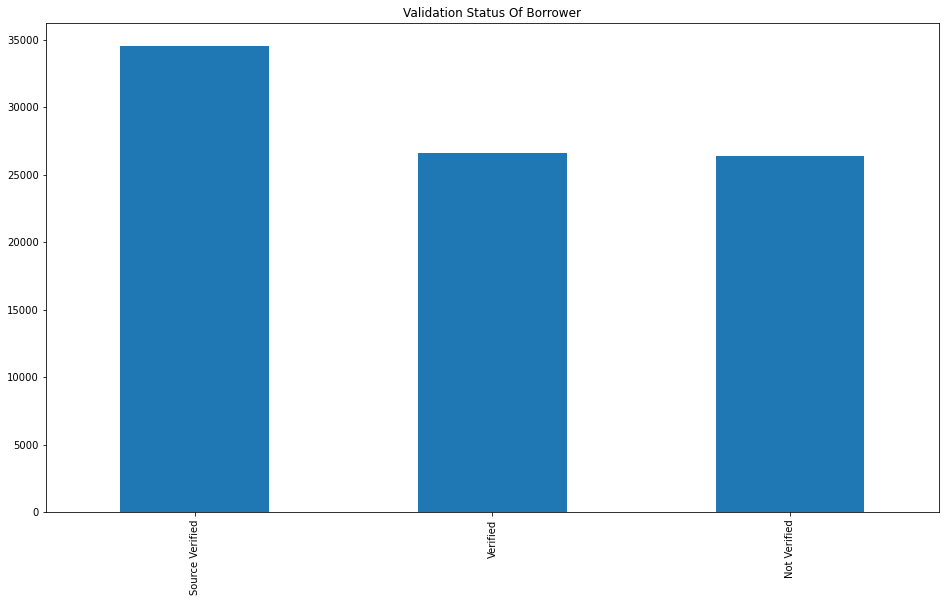

In [51]:
df_train_copy['Validation'].value_counts().plot(kind = 'bar', title = 'Validation Status Of Borrower', figsize=(16,9))
plt.show()

In [52]:
df_train_copy.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0   95074    421802       2         10         Verified  633600.000000   
1  134131   3964312       4          7  Source Verified   85483.200000   
2   92602   4247560       3          0  Source Verified   79200.000000   
3   22591    197179       3          0         Verified   61600.000000   
4  125060   4646684       5          2  Source Verified   68053.920000   

  Home Status  Unpaid 2 years  Already Defaulted       Designation  \
0    Mortgage               0                  0   GLENDALE NISSAN   
1        Rent               0                  0  Business Teacher   
2        Rent               0                  0            driver   
3        Rent               0                  0          AvePoint   
4        Rent               0                  0       Lead Tester   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0       12.549600 91300.000000 42023.250000                    0   
1        9.004800 27400.000000 38133.000000                    0   
2       24.914400 32800.000000 17100.000000                    0   
3       16.581600  7000.000000  5130.000000                    0   
4       40.051200 70800.000000 19665.000000                    0   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0         15.390000   88.924000          3    607161.900000          0.000000   
1          9.940000  102.856000          0    269234.060000          0.000000   
2         22.350000   60.372000          0     22476.530000          0.000000   
3         10.360000  116.272000          1     15242.090000          0.000000   
4         13.680000  127.280000          1     65433.940000          0.000000   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           19  fully paid  California            17     58598.000000   
1           30       whole          NC            15     18924.000000   
2           25       whole     Florida             7     15604.000000   
3           22  fully paid   NewJersey             9     22410.000000   
4           32  fully paid          LA            10     36022.000000   

  Duration  Unpaid Amount               Reason  Claim Type  Due Fee  \
0        3   31216.050000  debt  consolidation           0 0.000000   
1        5   11660.490000  debt  consolidation           0 0.000000   
2        5    5637.870000      major  purchase           0 0.000000   
3        3   15607.170000      major  purchase           0 0.000000   
4        5   27472.860000  debt  consolidation           0 0.000000   

   Loan_Status  
0            0  
1            0  
2            0  
3            1  
4            0

<Figure size 1080x576 with 0 Axes>

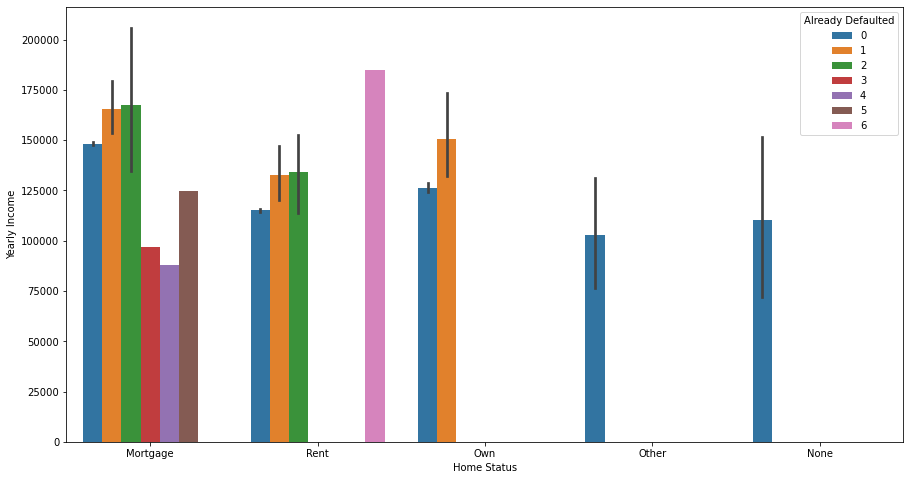

<Figure size 1080x576 with 0 Axes>

In [53]:
sns.barplot(x = df_train_copy['Home Status'], y = df_train_copy['Yearly Income'], hue = df_train_copy['Already Defaulted'])
plt.figure(figsize=(15,8))

**Insights:**

    1. From the above plot, we can see that the borrowers who have Mortgage, have defaulted maximum and maximum of 2 loans they have defaulted. Minimum being 4 loans already defaulted.

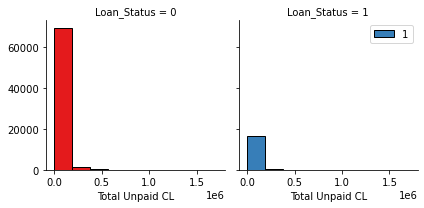

<Figure size 1080x576 with 0 Axes>

In [54]:
bins = np.linspace(df_train_copy['Total Unpaid CL'].min(), df_train_copy['Total Unpaid CL'].max(), 10)
g = sns.FacetGrid(df_train_copy, col="Loan_Status", hue="Loan_Status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Total Unpaid CL', bins=bins, ec="k")
plt.figure(figsize=(15,8))
g.axes[-1].legend()
plt.show()

**Insights:**

    1. Maximum customers who have defaulted the car loan are less likely to get the loan.
    2. There are few customers who have unpaid car loan but still got the funding from the institution.
    3. This shows that upaid obligations effect the next funding from the institution to the borrower.

## 3 Feature Engineering

In this section you can implement the feature engineering techniques for dimensionality reduction












In [55]:
df_train_copy.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0   95074    421802       2         10         Verified  633600.000000   
1  134131   3964312       4          7  Source Verified   85483.200000   
2   92602   4247560       3          0  Source Verified   79200.000000   
3   22591    197179       3          0         Verified   61600.000000   
4  125060   4646684       5          2  Source Verified   68053.920000   

  Home Status  Unpaid 2 years  Already Defaulted       Designation  \
0    Mortgage               0                  0   GLENDALE NISSAN   
1        Rent               0                  0  Business Teacher   
2        Rent               0                  0            driver   
3        Rent               0                  0          AvePoint   
4        Rent               0                  0       Lead Tester   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0       12.549600 91300.000000 42023.250000                    0   
1        9.004800 27400.000000 38133.000000                    0   
2       24.914400 32800.000000 17100.000000                    0   
3       16.581600  7000.000000  5130.000000                    0   
4       40.051200 70800.000000 19665.000000                    0   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0         15.390000   88.924000          3    607161.900000          0.000000   
1          9.940000  102.856000          0    269234.060000          0.000000   
2         22.350000   60.372000          0     22476.530000          0.000000   
3         10.360000  116.272000          1     15242.090000          0.000000   
4         13.680000  127.280000          1     65433.940000          0.000000   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           19  fully paid  California            17     58598.000000   
1           30       whole          NC            15     18924.000000   
2           25       whole     Florida             7     15604.000000   
3           22  fully paid   NewJersey             9     22410.000000   
4           32  fully paid          LA            10     36022.000000   

  Duration  Unpaid Amount               Reason  Claim Type  Due Fee  \
0        3   31216.050000  debt  consolidation           0 0.000000   
1        5   11660.490000  debt  consolidation           0 0.000000   
2        5    5637.870000      major  purchase           0 0.000000   
3        3   15607.170000      major  purchase           0 0.000000   
4        5   27472.860000  debt  consolidation           0 0.000000   

   Loan_Status  
0            0  
1            0  
2            0  
3            1  
4            0

In [58]:
from sklearn.preprocessing import LabelEncoder

In [60]:
from sklearn import preprocessing

In [61]:
label_encoder = preprocessing.LabelEncoder()
df_train_copy['Validation'] = label_encoder.fit_transform(df_train_copy['Validation'])
df_train_copy['Home Status'] = label_encoder.fit_transform(df_train_copy['Home Status'])
df_train_copy['Designation'] = label_encoder.fit_transform(df_train_copy['Designation'])
df_train_copy['File Status'] = label_encoder.fit_transform(df_train_copy['File Status'])
df_train_copy['State'] = label_encoder.fit_transform(df_train_copy['State'])
df_train_copy['Reason'] = label_encoder.fit_transform(df_train_copy['Reason'])

In [62]:
label_encoder = preprocessing.LabelEncoder()
df_test_copy['Validation'] = label_encoder.fit_transform(df_test_copy['Validation'])
df_test_copy['Home Status'] = label_encoder.fit_transform(df_test_copy['Home Status'])
df_test_copy['Designation'] = label_encoder.fit_transform(df_test_copy['Designation'])
df_test_copy['File Status'] = label_encoder.fit_transform(df_test_copy['File Status'])
df_test_copy['State'] = label_encoder.fit_transform(df_test_copy['State'])
df_test_copy['Reason'] = label_encoder.fit_transform(df_test_copy['Reason'])

In [63]:
df_train_copy.head()

ID  Asst_Reg GGGrade Experience  Validation  Yearly Income  \
0   95074    421802       2         10           2  633600.000000   
1  134131   3964312       4          7           1   85483.200000   
2   92602   4247560       3          0           1   79200.000000   
3   22591    197179       3          0           2   61600.000000   
4  125060   4646684       5          2           1   68053.920000   

   Home Status  Unpaid 2 years  Already Defaulted  Designation  \
0            0               0                  0        12862   
1            4               0                  0         4177   
2            4               0                  0        36009   
3            4               0                  0         2918   
4            4               0                  0        16887   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0       12.549600 91300.000000 42023.250000                    0   
1        9.004800 27400.000000 38133.000000                    0   
2       24.914400 32800.000000 17100.000000                    0   
3       16.581600  7000.000000  5130.000000                    0   
4       40.051200 70800.000000 19665.000000                    0   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0         15.390000   88.924000          3    607161.900000          0.000000   
1          9.940000  102.856000          0    269234.060000          0.000000   
2         22.350000   60.372000          0     22476.530000          0.000000   
3         10.360000  116.272000          1     15242.090000          0.000000   
4         13.680000  127.280000          1     65433.940000          0.000000   

   Sub GGGrade  File Status  State  Account Open  Total Unpaid CL Duration  \
0           19            0      6            17     58598.000000        3   
1           30            1     25            15     18924.000000        5   
2           25            1      9             7     15604.000000        5   
3           22            0     31             9     22410.000000        3   
4           32            0     16            10     36022.000000        5   

   Unpaid Amount  Reason  Claim Type  Due Fee  Loan_Status  
0   31216.050000       2           0 0.000000            0  
1   11660.490000       2           0 0.000000            0  
2    5637.870000       5           0 0.000000            0  
3   15607.170000       5           0 0.000000            1  
4   27472.860000       2           0 0.000000            0

**Principle Component Analysis**

_Scaling The Data_

In [64]:
df_train_copy_std = StandardScaler().fit_transform(df_train_copy.drop('Loan_Status', axis = 1))
print(df_train_copy_std)

[[ 0.30824871 -1.4753496  -0.6218867  ... -0.16982105 -0.02293449
  -0.08922763]
 [ 1.39016316  0.07225691  0.91233721 ... -0.16982105 -0.02293449
  -0.08922763]
 [ 0.23977206  0.19599868  0.14522525 ...  1.47239766 -0.02293449
  -0.08922763]
 ...
 [ 0.50434345  0.94713027 -0.6218867  ... -0.16982105 -0.02293449
  -0.08922763]
 [ 0.86971846 -0.51036888  0.14522525 ... -0.16982105 -0.02293449
  -0.08922763]
 [ 0.58232151  1.23999295  0.14522525 ... -0.16982105 -0.02293449
  -0.08922763]]


In [65]:
#Covariance Matrix

cov_mat = np.cov(df_train_copy_std.T)
print(cov_mat)

[[ 1.00001143e+00 -4.93184407e-03 -5.14958854e-03 -5.78850579e-03
  -1.17695695e-03 -4.33234666e-03 -3.93840734e-03  5.55336593e-04
   4.23777663e-03  2.70211442e-04  2.27801514e-03 -2.13365848e-03
   1.57226884e-03 -2.40025847e-03  6.27023328e-04 -9.85918786e-04
  -2.31818576e-03  5.62250516e-03  7.52762767e-04 -5.51450881e-03
  -2.40406338e-03  7.83189065e-04  2.72354210e-03  2.22259584e-03
  -1.04449032e-03  1.09612688e-03 -2.16761783e-03 -1.30486019e-03
  -2.50275173e-03]
 [-4.93184407e-03  1.00001143e+00 -2.43675350e-02 -1.21301770e-02
  -4.18210720e-02  3.40767722e-02  1.60129984e-02  3.48422219e-02
   1.11441455e-02  5.76477300e-03  8.64617466e-02 -1.41247197e-02
   3.54629682e-02  6.00839176e-02 -3.91779842e-03 -7.43568315e-02
  -1.09052867e-01  1.02651626e-02 -1.11598704e-01 -2.77650055e-02
   2.98782018e-01  3.87235513e-03  5.52174415e-02  5.74221276e-02
   5.77263251e-02  3.12819337e-02 -4.76975871e-03  3.20347129e-02
  -6.48341275e-02]
 [-5.14958854e-03 -2.43675350e-02  1.0

**Insights:**

    1. The diagonal entried corresponds to the variance of each variable, hence it is always 1.
    2. The entries other than diagonal entries corresponds the variances between the features

In [66]:
eig_val, eig_vec = np.linalg.eig(cov_mat)
print('Eigen_values of the covariance matrix are:', '\n', eig_val,'\n')
print('Eigen_vectors of the covariance matrix are:', '\n', eig_vec,'\n')

Eigen_values of the covariance matrix are: 
 [3.13246689 2.72126408 0.02333932 0.15793167 1.48429285 0.34962166
 0.41059978 0.45632517 0.50021428 1.38367478 1.3317148  1.27118622
 0.66509108 0.701507   0.74348915 1.14793635 1.12821628 0.81188768
 0.84245382 0.8605553  1.07272747 0.91429182 0.92614628 0.95825031
 1.02075454 0.98280537 1.00300613 0.9984502  1.00013115] 

Eigen_vectors of the covariance matrix are: 
 [[-1.68847643e-03  4.31531412e-03  2.75244236e-04  1.40012414e-04
  -2.52319454e-03 -4.87214487e-03 -2.45656886e-04  2.82091180e-03
   2.37811947e-03 -3.38374931e-03  1.46922024e-02 -1.63398915e-02
   1.52335480e-03  1.17065210e-02 -1.22970134e-02  1.01031128e-02
  -3.18151208e-02 -1.29307987e-02 -4.22624190e-02  2.25487155e-02
   2.98653146e-02 -1.48258342e-02  8.73221289e-03 -8.38880614e-02
   1.04793647e-01 -6.63881909e-02  5.82897471e-01 -7.06556687e-01
   3.64647256e-01]
 [-4.32889717e-02  4.56356569e-02  2.96005863e-03 -3.48942072e-03
   5.17188686e-01  4.68002719e-03  

**Insights:**

    1.The eigen vectors corresponding to the largest eigen values represents the highest variations in the data set.
    2. High variance means the feature contains high amount of information about the dataset/ feature.

In [67]:
#Deciding the number of Principle Components

eig_val = list(eig_val)

eig_val.sort(reverse=True)

print(eig_val)

[3.1324668893124845, 2.7212640762371514, 1.4842928499675696, 1.3836747799696019, 1.3317148008684585, 1.2711862167814338, 1.1479363501320972, 1.1282162758335292, 1.072727471200937, 1.02075453856027, 1.0030061267904855, 1.0001311463023426, 0.9984502019166653, 0.9828053723762935, 0.9582503131427589, 0.9261462823822693, 0.9142918197923238, 0.8605553014094, 0.8424538167529715, 0.8118876828795906, 0.7434891536366257, 0.7015069970352608, 0.6650910803976645, 0.5002142848175539, 0.456325171646359, 0.410599784583564, 0.3496216581422737, 0.15793167324543533, 0.023339316245908768]


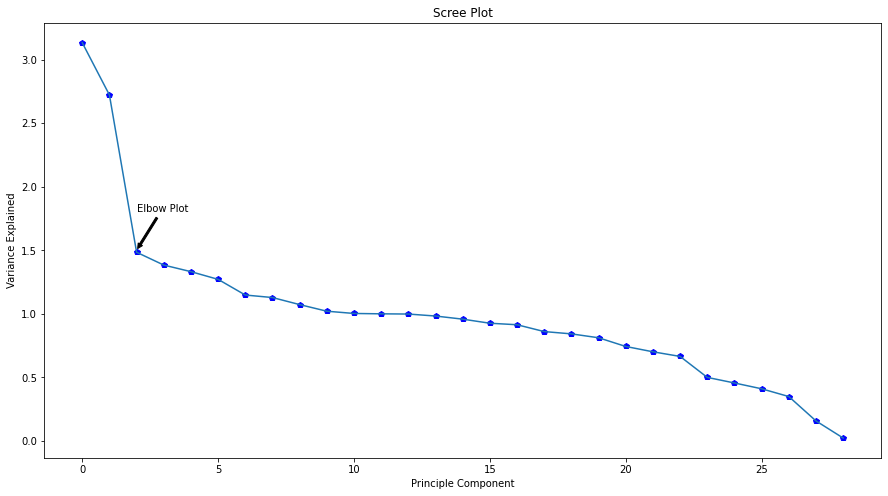

In [68]:
plt.plot(eig_val,'bp')

plt.plot(eig_val)

plt.title('Scree Plot')
plt.xlabel('Principle Component')
plt.ylabel('Variance Explained')

plt.annotate(s='Elbow Plot', xy=(2.0,1.5), xytext=(2,1.8), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

plt.show()

**Insights:**

    1. From the above plot, we can see that after the elbow point, principle components do not contribute much to the variance in the data.
    2. It can also be observed that the first 3 principle components contribute much towards the variance in the dataset.

In [69]:
percent = []

for i in eig_val:
    var = (i/sum(eig_val))*100
    percent.append(var)
    
print(percent)

[10.801486516175473, 9.383561986469916, 5.118192712485207, 4.771237815667388, 4.592067521623214, 4.383350651513634, 3.958355968481111, 3.8903564894249376, 3.6990179705462314, 3.5198030096348734, 3.458602289183863, 3.4486886766624045, 3.4428923829559075, 3.3889453114306662, 3.304273661071058, 3.1935713719080208, 3.1526943818722524, 2.9673981603160966, 2.904979961066724, 2.7995807040110803, 2.5637264021300883, 2.4189619993532285, 2.293391308126705, 1.7248571313202392, 1.5735170913846186, 1.4158451448779192, 1.2055781464351034, 0.5445857528000915, 0.08047948107195144]


In [70]:
np.cumsum(percent)

array([ 10.80148652,  20.1850485 ,  25.30324122,  30.07447903,
        34.66654655,  39.0498972 ,  43.00825317,  46.89860966,
        50.59762763,  54.11743064,  57.57603293,  61.02472161,
        64.46761399,  67.8565593 ,  71.16083296,  74.35440434,
        77.50709872,  80.47449688,  83.37947684,  86.17905754,
        88.74278394,  91.16174594,  93.45513725,  95.17999438,
        96.75351147,  98.16935662,  99.37493477,  99.91952052,
       100.        ])

In [71]:
eigenvect = eig_vec[:,[0,1,8,9,10]]
print(eigenvect)

[[-1.68847643e-03  4.31531412e-03  2.37811947e-03 -3.38374931e-03
   1.46922024e-02]
 [-4.32889717e-02  4.56356569e-02  2.01111484e-02  1.95592663e-01
  -2.55476741e-01]
 [-8.51462435e-03 -5.67603097e-01  2.29691719e-01  6.77844525e-02
   7.51144381e-04]
 [-1.15813942e-01 -4.54395937e-03  4.44734927e-02  5.75333458e-02
  -1.33244707e-01]
 [-1.44885748e-01 -2.29719166e-01  1.71495337e-01 -4.43879071e-02
  -1.34282879e-02]
 [-3.27692026e-01  8.10990549e-02 -1.14496520e-01  7.63631073e-02
  -2.35976993e-01]
 [ 2.60749846e-01 -5.72524457e-02 -4.31954409e-02 -1.56892053e-01
   1.97079481e-01]
 [-1.38344302e-02 -3.69452338e-02 -7.72709128e-02  2.89110700e-01
  -1.01574875e-01]
 [-1.33979987e-02 -1.94172035e-02 -1.56368497e-02  1.95117728e-01
  -4.71037255e-02]
 [ 2.64388952e-02 -1.72893253e-02 -2.43929813e-03  1.00962610e-01
  -5.39212261e-02]
 [-7.69921436e-02 -1.51047552e-01 -5.07923408e-01 -1.00572356e-01
   4.38714371e-01]
 [ 2.98239503e-02  4.20951688e-03  6.76667302e-02 -2.00144732e-01

In [72]:
df_pca = pd.DataFrame(df_train_copy_std.dot(eigenvect), columns = ['PC1', 'PC2','PC3','PC4', 'PC5'])

df_pca.head()

PC1       PC2       PC3       PC4       PC5
0 -3.217958  0.831140 -0.494435  0.593407 -0.553710
1  0.052579 -1.596025  1.171660 -0.285194 -1.315979
2  1.943189 -0.821110 -0.533439  0.211155 -0.954164
3  2.298377 -0.526672  0.399300 -0.417199  1.110822
4  0.961770 -2.795881 -0.144642 -1.143801  0.659142

## 4 Modelling + HyperParameter Tuning

In this you can build various ML models and try tuning the parameters involved to achieve better score

**SMOT (Systematic Oversampling Technique) Analysis**

In [73]:
X = df_train_copy.drop(['Loan_Status'], axis =1)
df_target = df_train_copy['Loan_Status']

In [74]:
sm = SMOTE(sampling_strategy=0.95,random_state=0)
X,df_target = sm.fit_resample(X, df_target)

In [75]:
df_target.value_counts(normalize = True)

0   0.512823
1   0.487177
Name: Loan_Status, dtype: float64

**Insights:**

    1. As we can see that after using SMOT analysis, our data set has been balanced.

In [76]:
X.head()

ID  Asst_Reg  GGGrade Experience  Validation  Yearly Income  \
0   95074    421802 2.000000  10.000000           2  633600.000000   
1  134131   3964312 4.000000   7.000000           1   85483.200000   
2   92602   4247560 3.000000   0.000000           1   79200.000000   
3   22591    197179 3.000000   0.000000           2   61600.000000   
4  125060   4646684 5.000000   2.000000           1   68053.920000   

   Home Status  Unpaid 2 years  Already Defaulted  Designation  \
0            0               0                  0        12862   
1            4               0                  0         4177   
2            4               0                  0        36009   
3            4               0                  0         2918   
4            4               0                  0        16887   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0       12.549600 91300.000000 42023.250000                    0   
1        9.004800 27400.000000 38133.000000                    0   
2       24.914400 32800.000000 17100.000000                    0   
3       16.581600  7000.000000  5130.000000                    0   
4       40.051200 70800.000000 19665.000000                    0   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0         15.390000   88.924000          3    607161.900000          0.000000   
1          9.940000  102.856000          0    269234.060000          0.000000   
2         22.350000   60.372000          0     22476.530000          0.000000   
3         10.360000  116.272000          1     15242.090000          0.000000   
4         13.680000  127.280000          1     65433.940000          0.000000   

   Sub GGGrade  File Status  State  Account Open  Total Unpaid CL Duration  \
0           19            0      6            17     58598.000000 3.000000   
1           30            1     25            15     18924.000000 5.000000   
2           25            1      9             7     15604.000000 5.000000   
3           22            0     31             9     22410.000000 3.000000   
4           32            0     16            10     36022.000000 5.000000   

   Unpaid Amount  Reason  Claim Type  Due Fee  
0   31216.050000       2           0 0.000000  
1   11660.490000       2           0 0.000000  
2    5637.870000       5           0 0.000000  
3   15607.170000       5           0 0.000000  
4   27472.860000       2           0 0.000000

In [77]:
X = add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (96898, 30)
y_train (96898,)
X_test (41528, 30)
y_test (41528,)


## Model 1

**Logistic Regression**

In [78]:
logreg = Logit(y_train, X_train.astype('int64')).fit()

print(logreg.summary())

         Current function value: 0.438335
         Iterations: 35


C:\Users\Pluto\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                96898
Model:                          Logit   Df Residuals:                    96868
Method:                           MLE   Df Model:                           29
Date:                Tue, 24 May 2022   Pseudo R-squ.:                  0.3673
Time:                        00:10:53   Log-Likelihood:                -42474.
converged:                      False   LL-Null:                       -67128.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.7043      0.086     19.771      0.000       1.535       1.873
ID                  -6.501e-07   2.44e-07     -2.669      0.008   -1.13e-06   -1.73e-07
Asst_Reg        

**Insights:**

    1. From the above output, we can see that the LLR p-value is less than 0.05, which implies that our model is significant.
    

In [ ]:
print('AIC is Akaike Information Criterion value','\n', logreg.aic)

In [79]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds'])
df_odds

Odds
const               5.497412
ID                  0.999999
Asst_Reg            0.999999
GGGrade             0.159968
Experience          0.983337
Validation          0.688375
Yearly Income       1.000001
Home Status         0.909588
Unpaid 2 years      0.721220
Already Defaulted   0.502710
Designation         0.999996
Debt to Income      0.992905
Postal Code         1.000002
Lend Amount         1.000001
Deprecatory Records 0.619704
Interest Charged    1.002231
Usage Rate          0.991136
Inquiries           0.821222
Present Balance     1.000000
Gross Collection    0.131023
Sub GGGrade         1.521764
File Status         0.458200
State               0.998000
Account Open        0.985925
Total Unpaid CL     0.999999
Duration            0.596154
Unpaid Amount       0.999998
Reason              0.889033
Claim Type          0.000000
Due Fee             0.961126

**Insights:**

1. odds_const: The odds of getting a loan is 5.497412, considering all other variables take zero value
2. GGGrade: 0.159968, it implies that the odds of getting a loan increases by a factor of 0.159968 due to one unit increase in the GGGrade, keeping other variables constant
3. Experience :0.983337, it implies that the odds of getting a loan increases by a factor of 0.983337 due to one unit increase in the Experience, keeping other variables constant
4. Validation: 0.688375, it implies that the odds of getting a loan increases by a factor of 0.688375 due to one unit increase in the Validation, keeping other variables constant
5. Yearly Income: 1.000001, it implies that the odds of getting a loan increases by a factor of 1.000001 due to one unit increase in the Yearly Income, keeping other variables constant.
6. Home Status: 0.909588, it implies that the odds of getting a loan increases by a factor of 0.909588 due to one unit increase in the Home Status, keeping other variables constant.
7. Unpaid 2 years: 0.721220, it implies that the odds of getting a loan increases by a factor of 0.721220 due to one unit increase in the Unpaid 2 Years, keeping other variables constant.
8. Already Defaulted: 0.502710, it implies that the odds of getting a loan increases by a factor of 0.502710 due to one unit increase in the Already Defaulted, keeping other variables constant.
9. Designation: 0.999996, it implies that the odds of getting a loan increases by a factor of 0.999996 due to one unit increase in the Designation, keeping other variables constant.
10. Debt to Income: 0.992905, it implies that the odds of getting a loan increases by a factor of 0.992905 due to one unit increase in the Debt To Income, keeping other variables constant.
11. Deprecatory Records:0.619704, it implies that the odds of getting a loan increases by a factor of 0.619704 due to one unit increase in the Deprecatory Records, keeping other variables constant.

Note: From the above odds data frame, we can see that the chances of getting a loan is getting affected by Unpaid 2 Years, Already Defaulted. Moreover, the annual income has a positive effect in getting a loan sanctioned.


In [80]:
y_pred_prob = logreg.predict(X_test.astype(np.float))

y_pred_prob.head()

190      0.211723
37423    0.017448
109851   0.470344
70563    0.864158
4317     0.766160
dtype: float64

In [81]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[:10]

[0, 0, 0, 1, 1, 0, 1, 0, 1, 0]

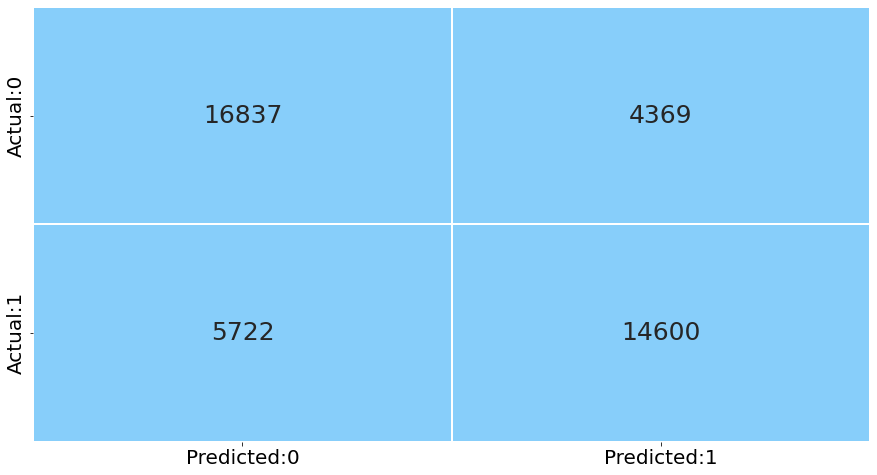

In [82]:
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [84]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [85]:
acc_table = classification_report(y_test, y_pred)

print(acc_table)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77     21206
           1       0.77      0.72      0.74     20322

    accuracy                           0.76     41528
   macro avg       0.76      0.76      0.76     41528
weighted avg       0.76      0.76      0.76     41528



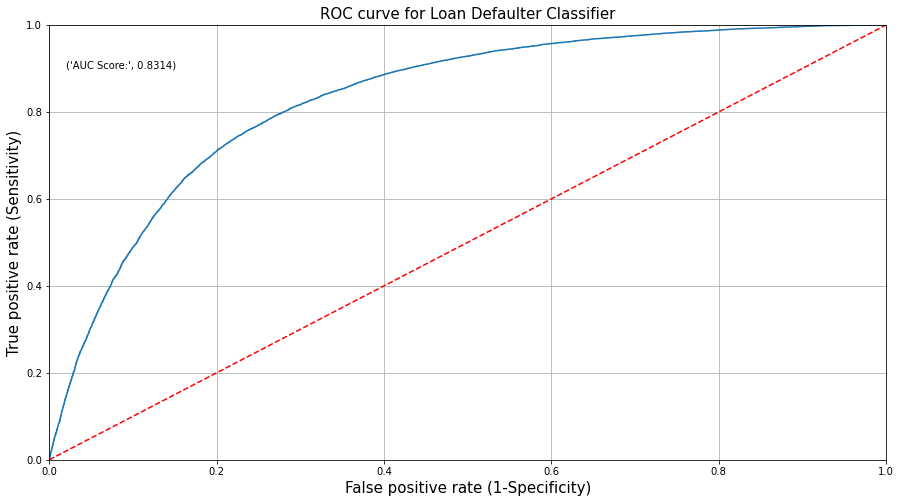

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Loan Defaulter Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                
plt.grid(True)

In [87]:
#Identifying the Best cut-offs using Youden's Index
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

youdens_table.head()

TPR      FPR  Threshold  Difference
0 0.793721 0.272423   0.402503    0.521298
1 0.793573 0.272376   0.402617    0.521198
2 0.793131 0.271951   0.403245    0.521179
3 0.793573 0.272423   0.402574    0.521151
4 0.793327 0.272187   0.402948    0.521140

**Insights:**

    1. As we can see that the optimal cut-off probability is approximately 0.40. Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.46, then consider it to be 0 else consider it to be 1.

In [88]:
y_pred_youden = [ 0 if x < 0.46 else 1 for x in y_pred_prob]
y_pred_youden[:10]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0]

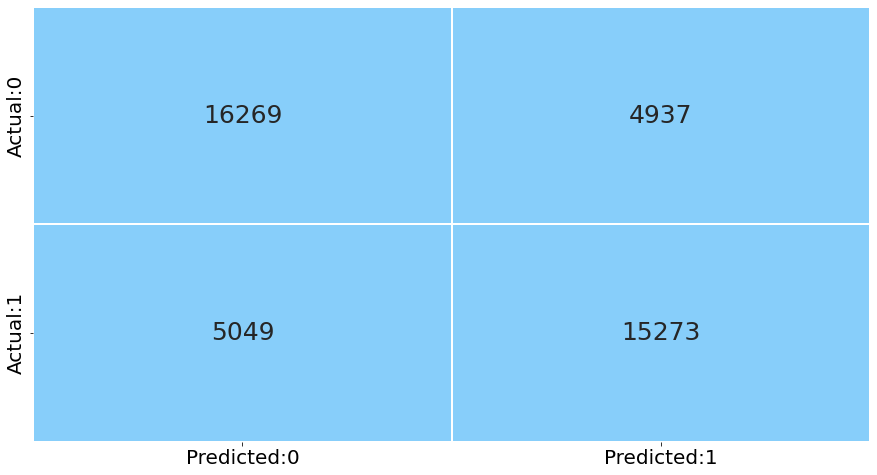

In [89]:
cm = confusion_matrix(y_test, y_pred_youden)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [90]:
acc_table = classification_report(y_test, y_pred_youden)

print(acc_table)

              precision    recall  f1-score   support

           0       0.76      0.77      0.77     21206
           1       0.76      0.75      0.75     20322

    accuracy                           0.76     41528
   macro avg       0.76      0.76      0.76     41528
weighted avg       0.76      0.76      0.76     41528



**Insights:**

From the above output, we can see that the model with cut-off = 0.40, is 76% accurate.

In [91]:
kappa = cohen_kappa_score(y_test, y_pred_youden)
print('kappa value:',kappa)

kappa value: 0.5187981713424387


**Insights:**
As the kappa score for the full model (with cut-off probability 0.40) is 0.5187, we can say that there is substantial agreement between the actual and predicted values.

## Model 2

**Random Forest**

In [538]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

In [539]:
def get_train_report(model):
     
    train_pred = model.predict(X_train)
    
    return(classification_report(y_train, train_pred))

def get_test_report(model):

    test_pred = model.predict(X_test)
    
    return(classification_report(y_test, test_pred))

In [540]:
train_report = get_train_report(rf_model)

print(train_report) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     49782
           1       1.00      0.99      0.99     47116

    accuracy                           0.99     96898
   macro avg       0.99      0.99      0.99     96898
weighted avg       0.99      0.99      0.99     96898



In [541]:
test_report = get_test_report(rf_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.87     21206
           1       0.90      0.81      0.86     20322

    accuracy                           0.87     41528
   macro avg       0.87      0.86      0.87     41528
weighted avg       0.87      0.87      0.87     41528



In [542]:
rfa_model = RandomForestClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

random_forest = rfa_model.fit(X_train, y_train)

train_report = get_train_report(random_forest)

print('Train data:\n', train_report)

test_report = get_test_report(random_forest)

print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80     49782
           1       0.80      0.73      0.77     47116

    accuracy                           0.78     96898
   macro avg       0.78      0.78      0.78     96898
weighted avg       0.78      0.78      0.78     96898

Test data:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80     21206
           1       0.81      0.74      0.77     20322

    accuracy                           0.78     41528
   macro avg       0.79      0.78      0.78     41528
weighted avg       0.79      0.78      0.78     41528



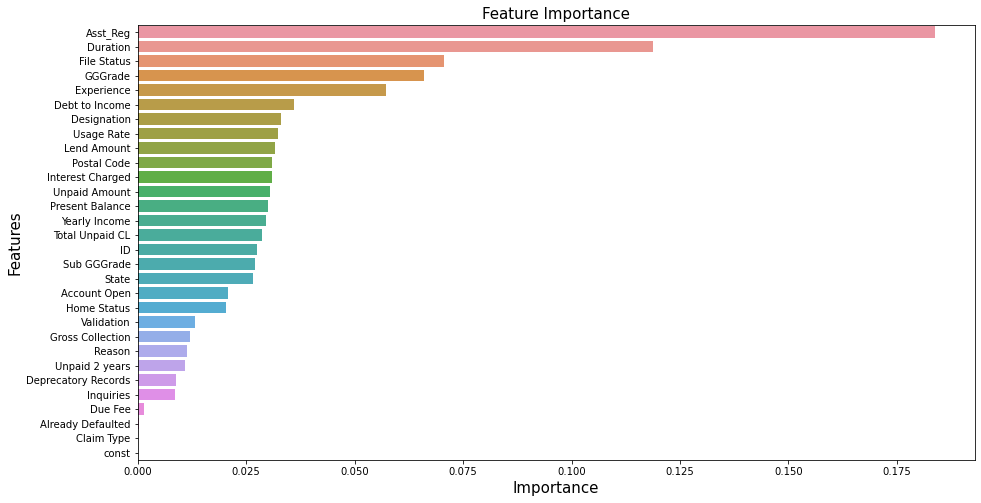

In [543]:
# Feature Importance

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

**Insights:**

From the above graphical representation, we can see that the value of all the assets registered under the borrowers name has the maximum importance where as Due Fee has the least importance.

## Model 3- Best Model

In [544]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [558]:
# Generalised functions

def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

def get_test_report(model):
    
    test_pred = model.predict(X_test)

    return(classification_report(y_test, test_pred))

def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Loan Defaulter Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

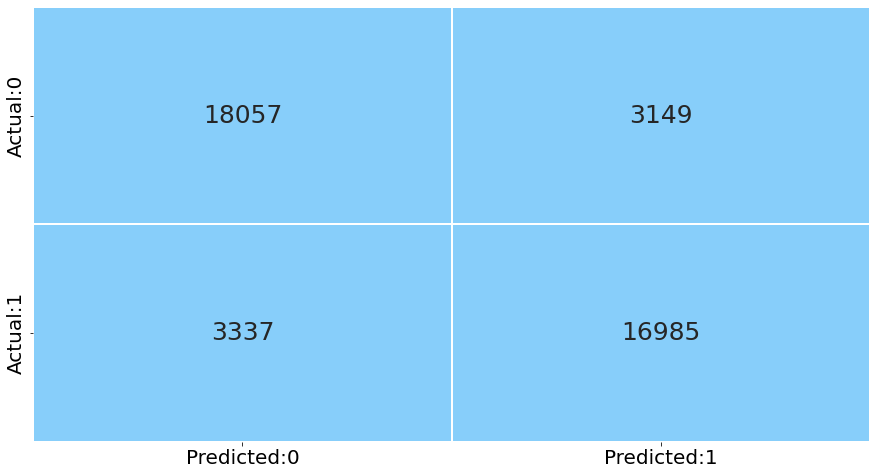

In [546]:
plot_confusion_matrix(ada_model)

In [547]:
test_report = get_test_report(ada_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     21206
           1       0.84      0.84      0.84     20322

    accuracy                           0.84     41528
   macro avg       0.84      0.84      0.84     41528
weighted avg       0.84      0.84      0.84     41528



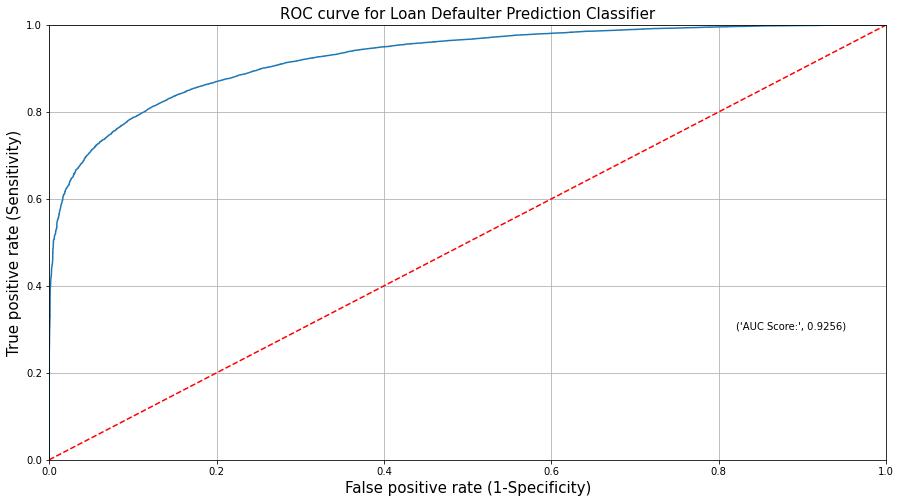

In [559]:
plot_roc(ada_model)

**Insights:**

    1. From the above output and graphical representation, we can see that the accuracy of our model is 84% and AUC (Area Under the Curve) Score is 0.92.

**Gradient Boosting**

In [549]:
gboost_model = GradientBoostingClassifier(n_estimators =40, max_depth = 10, random_state = 10)

gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=40, random_state=10)

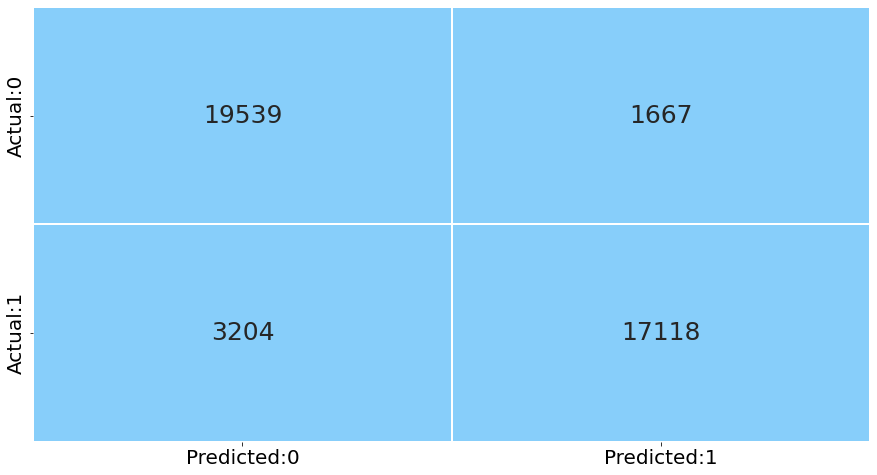

In [550]:
plot_confusion_matrix(gboost_model)

In [551]:
test_report = get_test_report(gboost_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     21206
           1       0.91      0.84      0.88     20322

    accuracy                           0.88     41528
   macro avg       0.89      0.88      0.88     41528
weighted avg       0.88      0.88      0.88     41528



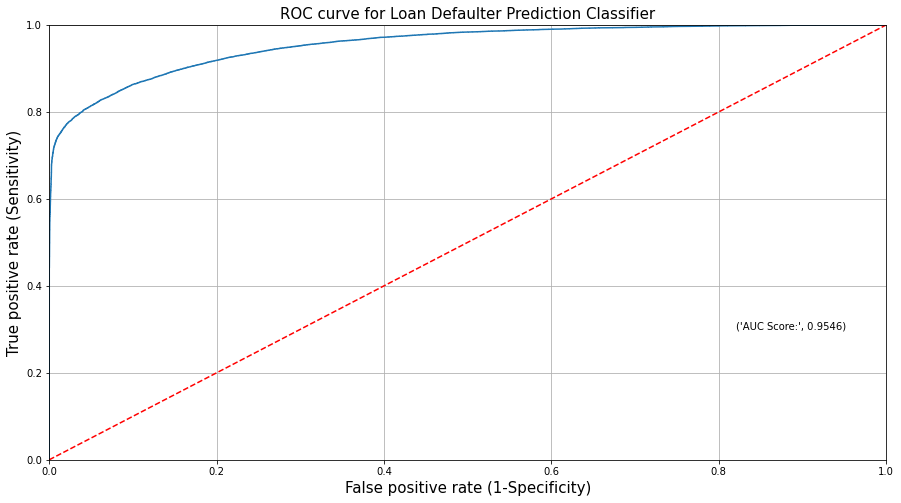

In [560]:
plot_roc(gboost_model)

**Insights:**

From the above output and graphical representation, we cans ee that the accuracy of our gradient boosting model is 88% and AUC Score is 0.95, which is better in terms of our Ada boost model.

In [553]:
## In order to avoid over fitting
gboost_grid_model = GradientBoostingClassifier(n_estimators = 40, max_depth = 5, random_state = 10)

gb_model = gboost_grid_model.fit(X_train, y_train)

train_report = get_train_report(gb_model)

print('Train data:\n', train_report)

test_report = get_test_report(gb_model)

print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87     49782
           1       0.89      0.84      0.86     47116

    accuracy                           0.87     96898
   macro avg       0.87      0.87      0.87     96898
weighted avg       0.87      0.87      0.87     96898

Test data:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87     21206
           1       0.89      0.84      0.86     20322

    accuracy                           0.87     41528
   macro avg       0.87      0.87      0.87     41528
weighted avg       0.87      0.87      0.87     41528



**Insights:**
    
    We can see that the accurcy has been incresed to 87%

In [93]:
df_sample = pd.read_csv('Sample_Submission.csv')
df_sample.head()

ID  Loan/No Loan
0  198980             0
1  167688             0
2  198768             0
3  192564             0
4  151199             0

In [106]:
predicted_array = pd.DataFrame(y_pred_youden, columns=['Predicted Array'])

In [107]:
predicted_array.head()

Predicted Array
0                0
1                0
2                1
3                1
4                1

In [127]:
df_sample.drop(labels=['Loan/No Loan'], axis = 'columns', inplace=True)

In [128]:
df_sample['Predicted_Array'] = predicted_array['Predicted Array']

In [129]:
df_sample.head()

ID  Predicted_Array
0  198980                0
1  167688                0
2  198768                1
3  192564                1
4  151199                1

In [131]:
df_sample.to_csv('df_sample.csv')